In [26]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
import scripts.helpers as h
from scripts.metrics import Metrics as m
import scripts.plotting as plot
import matplotlib.pyplot as plt

I am using pyccl version 2.8.0


In [25]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)
redshift_range_1 = np.linspace(0, 3.5, 3000)
redshift_range_2 = np.linspace(0, 3.5, 5000)
ells = np.geomspace(20, 2000, 50)

mtx_1 = m(cosmo, redshift_range_1, ells)
shear_1 = mtx_1.cosmic_shear_cls()
clu_1 = mtx_1.galaxy_clustering_cls()
source_bins = mtx_1.source_bins
lens_bins = mtx_1.lens_bins
source_bin_centers = h.get_bin_centers(source_bins, redshift_range_1)
lens_bin_centers = h.get_bin_centers(lens_bins, redshift_range_1)


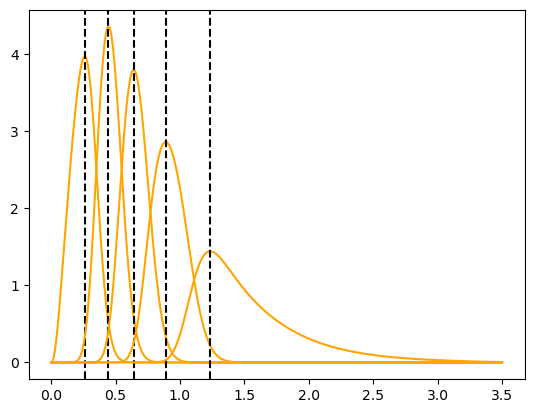

In [28]:
for i in source_bins.keys():
    plt.plot(redshift_range_1, source_bins[i], c="orange")
    plt.axvline(x=source_bin_centers[i], color='k', linestyle='--')

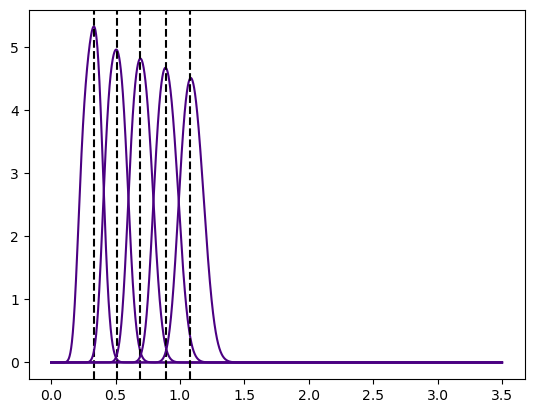

In [33]:
for i in lens_bins.keys():
    plt.plot(redshift_range_1, lens_bins[i], c="indigo")
    plt.axvline(x=lens_bin_centers[i], color='k', linestyle='--')

In [3]:
%%time
bin_centers_comparison = h.compare_bin_centers_over_resolutions(cosmo, ells, decimal_places=5)

CPU times: user 4.7 s, sys: 307 ms, total: 5.01 s
Wall time: 5.26 s


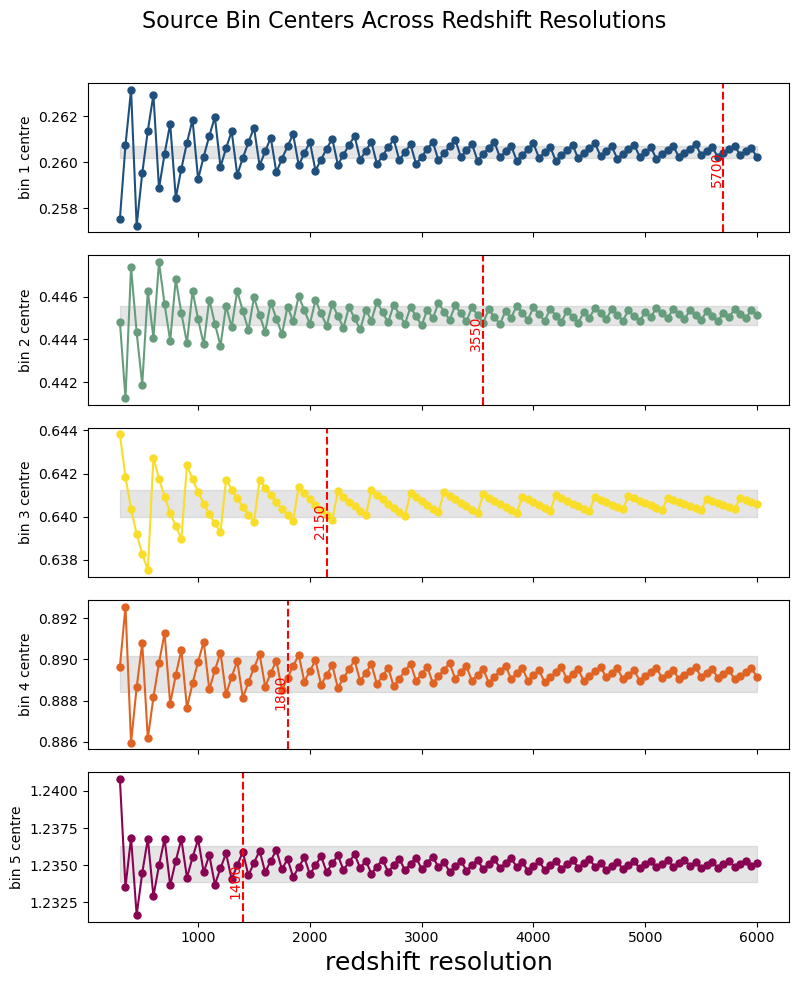

In [4]:
plot.plot_bin_centers_subplots(bin_centers_comparison, bin_type="source", percentage=0.1)

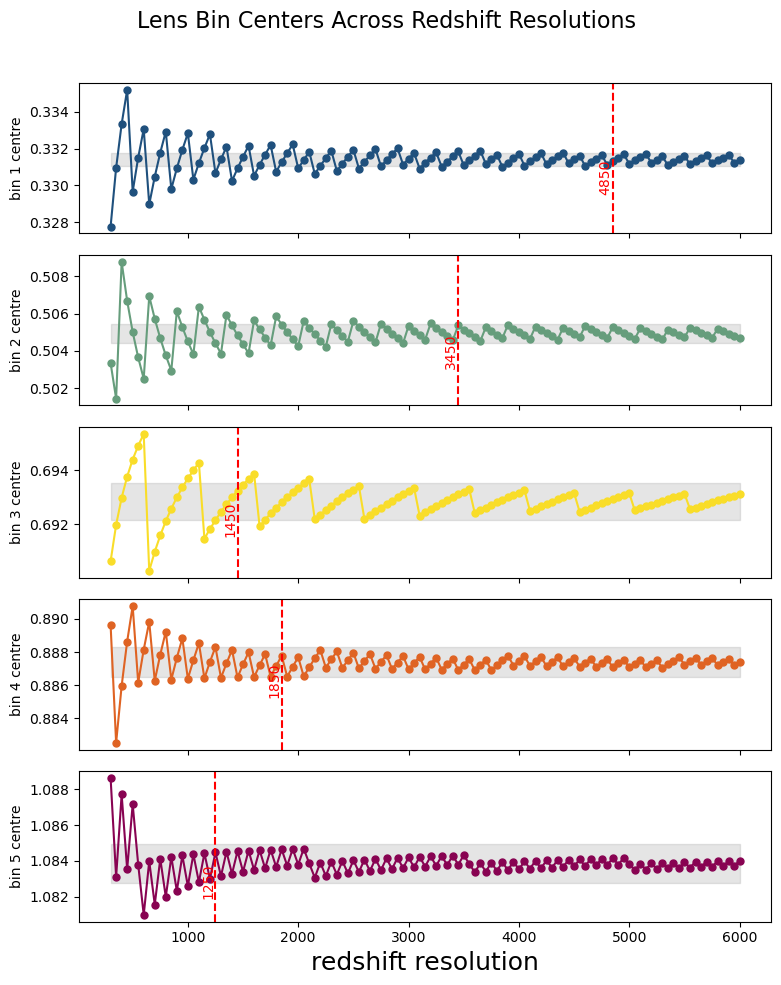

In [20]:
plot.plot_bin_centers_subplots(bin_centers_comparison, bin_type="lens", percentage=0.1)

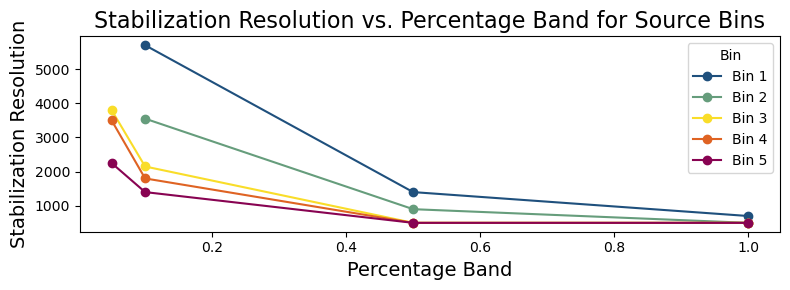

In [19]:
percs = (0.005, 0.01, 0.05, 0.1, 0.5, 1,)
plot.plot_stabilization_vs_percentage(bin_centers_comparison, bin_type="source", percentages=percs, stability_steps=5)

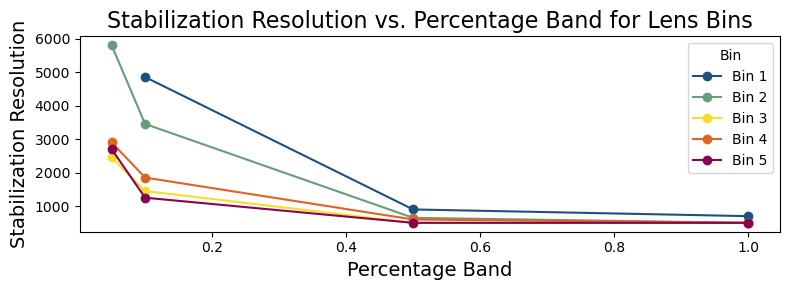

In [21]:
percs = (0.005, 0.01, 0.05, 0.1, 0.5, 1,)
plot.plot_stabilization_vs_percentage(bin_centers_comparison, bin_type="lens", percentages=percs, stability_steps=5)